In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Data Exploration: Data Handling and Formatting

In [91]:
def formatter(s, dict):
    i, j = 0, 0
    n = len(s)
    res = []
    while i < n and j < n:
        if s[j] != ';' and s[j] != '|':
            j = j+1
        else:
            substr = s[i:j]
            if s[j] == '|':
                j = j+2
                i = j
            else:
                j = j+1
                i = j
            res.append(substr.strip())
    res.append(s[i:j].strip())
    frmt_string = res
    not_spec = ['Not specified', 'Not Specified',
                'not Specified', 'not specified']
    count = 0
    for val in frmt_string:
        if ',' in val:
            temp = val.split(',')
            if len(temp) > 1 and temp[1].strip() in not_spec:
                if dict.get(temp[0].strip()) is None:
                    dict[temp[0].strip()] = 1
                    count = count+1

                else:
                    dict[temp[0].strip()] = dict.get(temp[0].strip()) + 1
            else:
                if dict.get(val.strip()) is None:
                    dict[val.strip()] = 1
                    count = count+1
                else:
                    dict[val.strip()] = dict.get(val.strip()) + 1
        else:
            if dict.get(val.strip()) is None:
                dict[val.strip()] = 1
                count = count+1
            else:
                dict[val.strip()] = dict.get(val.strip()) + 1
    return dict, frmt_string

Create a list of unique flavors based on your analysis. What is the total number 
of unique flavors in your list?

In [105]:
# a list of unique flavors based on your analysis. What is the total number
# of unique flavors in your list?
def tot_no_of_uniq_flav(df):
    flav = df['flavor'].to_list()
    dict = {}
    for i in range(0, len(flav)):
        s = str(flav[i])
        dict, _ = formatter(s, dict)
    return list(dict),len(dict)

In [107]:
flav_list,to_no_of_flav= tot_no_of_uniq_flav(df)
print("total no of flavors = ",to_no_of_flav)
print()
print(flav_list)

total no of flavors =  936

['Herbs', 'Fruit', 'Lemon', 'Honey', 'Ginger', 'Mango', 'Passion Fruit', 'Lemonade, pink', 'Cherry', 'Grape, red', 'Apple, Red', 'Pineapple', 'Guava', 'Vanilla', 'Orange', 'Superfruit, Pomegranate', 'Berry, Blackberry', 'nan', 'Apple, red', 'Apricot', 'Superfruit, acai', 'Guarana', 'Coffee', 'Berry, Blueberry', 'Grapefruit', 'Peach', 'Banana', 'Cola', 'Rose', 'Melon', 'Orange, blood', 'Apple, green', 'Berry, red', 'Tea', 'Vegetables', 'Strawberry', 'Grapefruit, pink', 'Raspberry', 'Cranberry', 'Mandarin', 'Mint', 'Tea, green', 'Wildberry', 'Grape, white', 'Tropical Fruit', 'Grapefruit, red', 'Fennel', 'Coriander', 'Superfruit, Lychee', 'Cinnamon', 'Pear', 'Plum', 'Tangerine', 'Lime', 'Unflavored', 'Citrus', 'Japanese', 'Rice', 'Prune', 'Carrot', 'Coffee, cappuccino', 'Caramel', 'Aloe Vera', 'Berry, mixed', 'Spices', 'Cocoa', 'Elderflower', 'Lemonade', 'Blackcurrant', 'Superfruit, pomegranate', 'Rhubarb', 'Mexican', 'Prickly Pear', 'Berry, Cranberry', 'Lemon-

Plot histogram of market subcategory against eventdate (years). Do any 
categories show negative trend over years?

In [108]:
# histogram of market subcategory against eventdate (years). Do any
# categories show negative trend over years?
def histogram(df):
    df['eventdate'] = pd.to_datetime(df['eventdate'], format='%m-%d-%Y')
    df['eventdate'] = pd. DatetimeIndex(df['eventdate']). year
    df = df.groupby([
        'market_subcategory', 'eventdate'])['id'].count().reset_index()
    df.rename(columns={'id': 'count'}, inplace=True)
    mar_sub = list(set(df['market_subcategory']))
    dict = {}
    for val in mar_sub:
        df_sub = df[df['market_subcategory'] == val].reset_index()
        index = list(df_sub['eventdate'])
        values = list(df_sub['count'])
        result = np.polyfit(index, list(values), deg=1)
        slope = result[-2]
        dict[val] = slope
    marsub_neg_tend = []
    for key, val in dict.items():
        if val < 0:
            marsub_neg_tend.append(key)
            print(key+" ,market sub cat has negative trend with  years")
    for val in marsub_neg_tend:
        ax = plt.gca()
        x = df[df['market_subcategory'] == val].reset_index()  
        x.plot(kind='bar',
               x='eventdate',
               y='count',
               color='blue', ax=ax)
        plt.title("market sub category "+val)
        plt.show()

Sports Others ,market sub cat has negative trend with  years
Sports Drinks RTD ,market sub cat has negative trend with  years


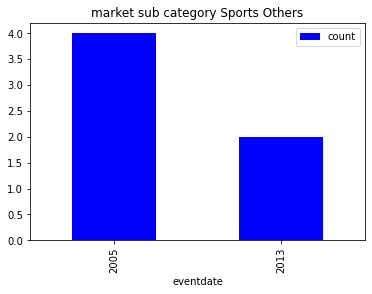

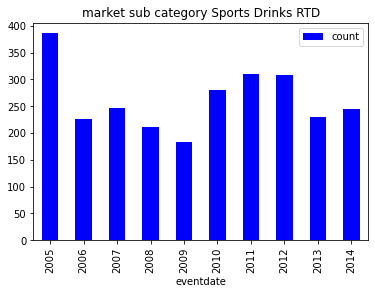

In [109]:
warnings.filterwarnings("ignore")
histogram(df)

Which market subcategory has highest unique flavors?

In [95]:
# market subcategory has highest unique flavors
def subcat_high_uniq_flav(df):
    df = df.groupby('market_subcategory')['flavor'].apply(list).reset_index()
    maxi = 0
    sub_cat = ""
    for i in range(0, len(df)):
        flavor_list = df['flavor'].loc[i]
        dict = {}
        count = 0
        for s in flavor_list:
            if type(s) == float:
                continue
            dict, _ = formatter(s, dict)
        count = len(dict)
        if count > maxi:
            maxi = count
            sub_cat = df['market_subcategory'].loc[i]
        print("uniq flav count ",count, df['market_subcategory'].loc[i])
    print("market subcategory has highest unique flavors = " ,maxi)
    return




In [110]:
df = pd.read_csv('Product Launch Dataset.csv', encoding='latin-1')
sub_cat=subcat_high_uniq_flav(df)

uniq flav count  359 Bottled Water - Flavoured
uniq flav count  12 Bottled Water - Unflavoured
uniq flav count  375 Carbonates
uniq flav count  593 Drink Concentrates & Mixes
uniq flav count  264 Energy Drinks
uniq flav count  191 Iced Coffee
uniq flav count  357 Iced Tea
uniq flav count  601 Juice & Juice Drinks
uniq flav count  373 Other Soft Drinks
uniq flav count  2 Other Soft Drinks  
uniq flav count  145 Sports Drinks RTD
uniq flav count  5 Sports Others
uniq flav count  60 Sports Powders
uniq flav count  5 Sports Supplements
market subcategory has highest unique flavors =  601


# 2. Data Exploration: Merging and Manipulating Datasets

number of product launches over different quarters for “fruit” 
Flavor?

In [116]:
# on the number of product launches over different quarters for “fruit” flavor
# no of fruit flav launches
def no_of_prod_launch(df):
    df['eventdate'] = pd.to_datetime(df['eventdate'], format='%m-%d-%Y')
    df['fruit flavor'] = "No"
    fc = pd.read_csv('Flavor Classification Dataset.csv', encoding='latin-1')
    fc = fc[fc['Flavor_Group'] == 'Fruit'].reset_index()
    fruit_flav = []
    for i in range(0, len(fc)):
        fruit_flav.append(fc['flavor'].loc[i].strip())
    for i in range(0, len(df)):
        flav_list = df['flavor'].loc[i]
        flag = 0
        if type(flav_list) == float:
            continue
        _, frmt_flav_list = formatter(flav_list,{})
        for val in frmt_flav_list:
            for j in range(0, len(fruit_flav)):
                if val.strip().lower() == fruit_flav[j].strip().lower():
                    df['fruit flavor'].loc[i] = "Yes"
                    flag = 1
                    break
            if flag == 1:
                break
    df = df[df['fruit flavor'] == "Yes"].reset_index()
    df = df.groupby(df['eventdate'].dt.to_period('Q'))['id'].count().reset_index()
    return df

In [117]:
df = pd.read_csv('Product Launch Dataset.csv', encoding='latin-1')
warnings.filterwarnings("ignore")
no_of_prod_launch(df)

,eventdate,id
0,2005Q1,5570
1,2005Q2,10
2,2005Q3,4
3,2005Q4,4
4,2006Q1,5358
5,2007Q1,5444
6,2008Q1,5942
7,2009Q1,7002
8,2010Q1,8275
9,2010Q2,2


# 3. Data Formatting, Merging and Manipulating Dataset

In [112]:
def MapPositioningCategory(df):
    df_pos_map = pd.read_csv('Positioning Category Mapping Dataset.csv',
                             encoding='latin-1')
    df['Positioning Group'] = ""
    map = {}
    for i in range(0, len(df_pos_map)):
        pos_subgrp = df_pos_map['Positioning Subcategory'].loc[i]
        pos_grp = df_pos_map['Positioning Group'].loc[i]
        map[str(pos_subgrp)] = str(pos_grp)
    for i in range(0, len(df)):
        pos_sub_grp = df['positioning'].loc[i]
        regex = str(pos_sub_grp).split(',')
        for j in range(0, len(regex)):
            if map.get(regex[j].strip()) is not None:
                df['Positioning Group'].loc[i] = map.get(regex[j].strip())
                break
    return df

insights on the distribution for “Convenience” & “Ethical Positioning”
Groups

In [71]:
#total no of products
#total no of flavors
#no of flavors with years
#no of products of convinece and ethical positioning with years
#avg of no of flavours for convenience and Ethical positioning for each country
def position_distribution(df):
    position_df = pd.read_csv('Positioning Category Mapping Dataset.csv' , encoding = 'latin-1')
    position_df = position_df[(position_df['Positioning Group']=='Convenience') | 
                              (position_df['Positioning Group']== 'Ethical')]
    position_df['count'] = 0
    
    for i in range(0,len(position_df)):
        count  = 0
        temp = position_df['Positioning Subcategory'].iloc[i]
        for j in range(0,len(df)):
            temp2 = df['positioning'].iloc[j]
            list = str(temp2).split(',')
            for k in range(0,len(list)):
                if temp == list[k].strip():
                    count = count +1
        position_df['count'].iloc[i] = count 
            
    print(position_df)

In [ ]:
def pos_dis_across_countries(df):
    position_df = pd.read_csv('Positioning Category Mapping Dataset.csv' , encoding = 'latin-1')
    
    pos_df_cons = position_df[position_df['Positioning Group']=='Convenience'].reset_index()
    pos_df_eth = position_df[position_df['Positioning Group']=='Ethical'].reset_index()
    print(pos_df_cons)
    
    dict_cons = {}
    dict_eth = {}
    
    for i in range(0, len(pos_df_cons)):
        pos_subgrp = pos_df_cons['Positioning Subcategory'].loc[i]
        pos_grp = pos_df_cons['Positioning Group'].loc[i]
        dict_cons[str(pos_subgrp).strip()] = str(pos_grp).strip()
    
    for i in range(0, len(pos_df_eth)):
        pos_subgrp = pos_df_eth['Positioning Subcategory'].loc[i]
        pos_grp =  pos_df_eth['Positioning Group'].loc[i]
        dict_eth[str(pos_subgrp).strip()] = str(pos_grp).strip()
        
    df['count of Convenience'] = 0
    df['count of ethical'] = 0
    df['total count of conv and eth'] = 0
    
    for i in range(0,len(df)):
        if type(df['positioning'].loc[i]) == float:
            continue
        groups = df['positioning'].loc[i].split(',')
        for val in groups:
            val = val.strip()
            if dict_cons.get(val) != None:
                df['count of Convenience'].loc[i] = df['count of Convenience'].loc[i]+1
            if dict_eth.get(val)!=None:
                df['count of ethical'].loc[i] = df['count of ethical'].loc[i]+1
        df['total count of conv and eth'] = df['count of Convenience'].loc[i]+df['count of ethical'].loc[i] 
        
    return df.groupby('country')['count of Convenience','count of ethical'].sum()

# 4. Data Aggregation

In [ ]:
#in excel

# 5. Data Exploration: Filtering and Subsetting 

Data of Canadian market for the year 2013 about Energy drinks with ethical packaging

In [ ]:
def data_for_client(df):
    # filtering country
    df = df[df['country'] == 'Canada']
    # filtering date
    regex = '2013.*'
    df = df[df.eventdate.str.contains(regex, na=False)]
    # filtering positioning
    regex = 'Ethical - Packaging.*'
    df = df[df.positioning.str.contains(regex, na=False)]
    # filering market subcategory
    regex = 'Energy Drinks.*'
    df = df[df.market_subcategory.str.contains(regex, na=False)].reset_index()
    return df

In [ ]:
df = pd.read_csv('Product Launch Dataset.csv', encoding='latin-1')
data_for_client(df)

 Identify TOP 5 unique flavors across countries in 2013

In [ ]:
# TOP 5 unique flavors across each countries in 2013
def top_uniq_flav(df, year='2013'):
    regex = '2013.*'
    df = df[df.eventdate.str.contains(regex, na=False)].reset_index()
    df = df.groupby('country')['flavor'].apply(list).reset_index()
    df["Top 5 unique flavor"] = ""
    for i in range(0, len(df)):
        flavor_list = df['flavor'].loc[i]
        dict = {}
        for s in flavor_list:
            if type(s) == float:
                continue
            dict, _ = formatter(s, dict)
            flavors = []
            for val, key in dict.items():
                flavors.append([val, key])
            flavors = sorted(flavors, key=lambda x: x[1], reverse=True)
            df["Top 5 unique flavor"].loc[i] = flavors[0:5]
    return df['Top 5 unique flavor'].head(5)


In [ ]:
df = pd.read_csv('Product Launch Dataset.csv', encoding='latin-1')
data_for_client(df)

In [ ]:
def top_uniq_flav_among_all_cntry(df, year='2013'):
    regex = '2013.*'
    df = df[df.eventdate.str.contains(regex, na=False)].reset_index()
    df = df['flavor'].to_list()
    dict = {}
    for i in range(0, len(df)):
        s = str(df[i])
        dict, _ = formatter(s, dict)
    flavors = []
    for val, key in dict.items():
        flavors.append([val, key])
    flavors = sorted(flavors, key=lambda x: x[1], reverse=True)
    print(flavors[0:5])
    

In [ ]:
df = pd.read_csv('Product Launch Dataset.csv', encoding='latin-1')
top_uniq_flav_among_all_cntry(df)

# 6. Hypothesis Testing: TOP 5 Positioning Groups

In [ ]:
def Hypothesis_Testing(df):
    regex = '2013.*'
    df = df[df.eventdate.str.contains(regex, na=False)].reset_index()
    df = MapPositioningCategory(df)
    df = df.groupby('Positioning Group')['country'].count().reset_index()
    print(df)
    return

# RESULTS

In [87]:
# read the product lauch dataset
df = pd.read_csv('Product Launch Dataset.csv', encoding='latin-1')
# tot_no_of_uniq_flav(df)
# data_for_client(df)
#top_uniq_flav(df,"")
# no_of_prod_launch(df)
# ans = formatter("Lemon; Honey; Ginger, Mango|| Passion Fruit,k")
# print(ans)
# MapPositioningCategory(df)
# histogram(df)
#Hypothesis_Testing(df)


# Q 1.0

In [93]:
tot_no_of_uniq_flav(df)

(['Herbs',
  'Fruit',
  'Lemon',
  'Honey',
  'Ginger',
  'Mango',
  'Passion Fruit',
  'Lemonade, pink',
  'Cherry',
  'Grape, red',
  'Apple, Red',
  'Pineapple',
  'Guava',
  'Vanilla',
  'Orange',
  'Superfruit, Pomegranate',
  'Berry, Blackberry',
  'nan',
  'Apple, red',
  'Apricot',
  'Superfruit, acai',
  'Guarana',
  'Coffee',
  'Berry, Blueberry',
  'Grapefruit',
  'Peach',
  'Banana',
  'Cola',
  'Rose',
  'Melon',
  'Orange, blood',
  'Apple, green',
  'Berry, red',
  'Tea',
  'Vegetables',
  'Strawberry',
  'Grapefruit, pink',
  'Raspberry',
  'Cranberry',
  'Mandarin',
  'Mint',
  'Tea, green',
  'Wildberry',
  'Grape, white',
  'Tropical Fruit',
  'Grapefruit, red',
  'Fennel',
  'Coriander',
  'Superfruit, Lychee',
  'Cinnamon',
  'Pear',
  'Plum',
  'Tangerine',
  'Lime',
  'Unflavored',
  'Citrus',
  'Japanese',
  'Rice',
  'Prune',
  'Carrot',
  'Coffee, cappuccino',
  'Caramel',
  'Aloe Vera',
  'Berry, mixed',
  'Spices',
  'Cocoa',
  'Elderflower',
  'Lemonade',
 

# Q 1.2

Sports Others ,market sub cat has negative trend with  years
Sports Drinks RTD ,market sub cat has negative trend with  years


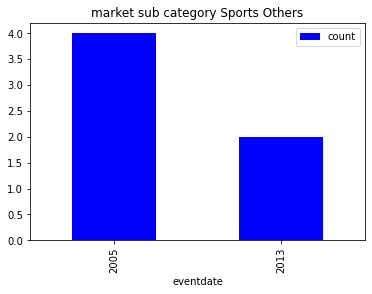

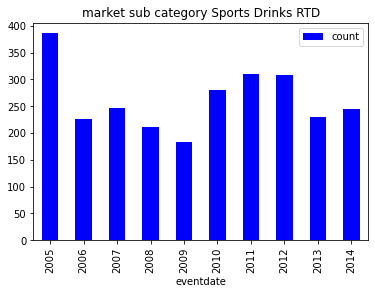

In [63]:
warnings.filterwarnings("ignore")
histogram(df)

# Q 1.3

uniq flav count  359 Bottled Water - Flavoured
uniq flav count  12 Bottled Water - Unflavoured
uniq flav count  375 Carbonates
uniq flav count  593 Drink Concentrates & Mixes
uniq flav count  264 Energy Drinks
uniq flav count  191 Iced Coffee
uniq flav count  357 Iced Tea
uniq flav count  601 Juice & Juice Drinks
uniq flav count  373 Other Soft Drinks
uniq flav count  2 Other Soft Drinks  
uniq flav count  145 Sports Drinks RTD
uniq flav count  5 Sports Others
uniq flav count  60 Sports Powders
uniq flav count  5 Sports Supplements
market subcategory has highest unique flavors =  601


KeyboardInterrupt: 